<a href="https://colab.research.google.com/github/visithraravi98-lang/Kitty/blob/main/K_Means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

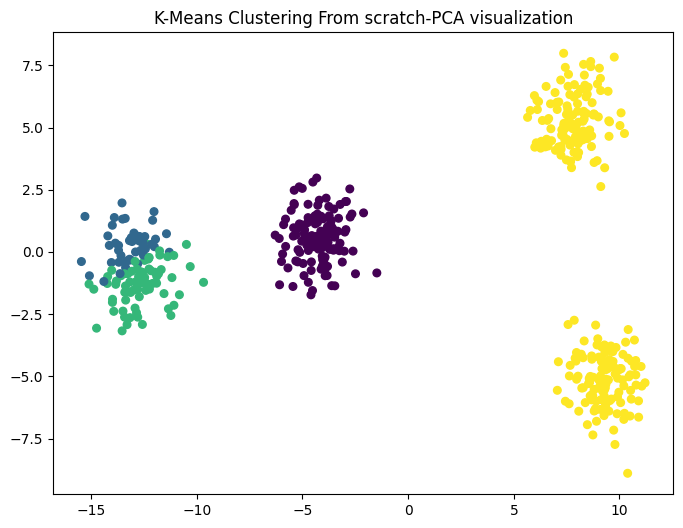

Custom K-Means Inertia (WCSS): 9264.516263239446
Scikit-learn K-Means Inertia: 2393.432323820602

First 10 data points:
[[ -9.72865221  -7.68956206   5.58380914   1.65985929   3.04178166]
 [ -9.70869128   7.2255275    7.49627449  -6.28854597  -6.45403394]
 [ -8.66923363   9.1079225    6.91624513  -5.43151998  -7.03159111]
 [ -7.81605852  11.05945626   6.19175656  -6.35542985  -5.8947264 ]
 [ -3.34841515   8.70507375   4.97114227   2.94871481  -7.35880143]
 [ -9.00621241   9.17171294   5.68941358  -6.12542456  -5.27475204]
 [ -4.53669845  -3.68508438   0.99287172  -0.69517538  -3.75383059]
 [ -8.21413509  -9.4396954    7.64330485   0.4293065    4.60192629]
 [-10.12427356  10.20625484   7.01614013  -3.91503411  -6.58696664]
 [ -6.56231052  -4.83938829   1.38532704  -0.32585029  -6.02160506]]

Cluster labels assigned by custom k-Means(first 10):
[2 3 3 3 3 3 0 2 3 0]


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# Generate Synthetic Data &K-means from scratch
x,y_true=make_blobs(n_samples=500,n_features=5,centers=4,cluster_std=1.0,random_state=42)
class KMeansFromScratch:
  def __init__(self,k=4,max_iters=100,tol=1e-4):
    self.k=k
    self.max_iters=max_iters
    self.tol=tol
    self.centroids = None
    self.labels_ = None
    self.inertia_ = None

  def initialize_centroids(self,x):
    indices=np.random.choice(len(x),self.k,replace =False)
    return x[indices]

  def assign_clusters(self,x,centroids):
    distances=np.linalg.norm(x[:,np.newaxis]-centroids,axis=2)
    return np.argmin(distances,axis=1)

  def update_centroids(self,x,labels):
    return np.array([x[labels==i].mean(axis=0) for i in range(self.k)])

  def compute_inertia(self,x,centroids,labels):
    inertia=0.0
    for i in range(self.k):
      cluster_points=x[labels==i]
      inertia+=np.sum((cluster_points-centroids[i])**2)
    return inertia

  def fit(self,x):
    self.centroids=self.initialize_centroids(x)
    for _ in range(self.max_iters):
      self.labels_=self.assign_clusters(x,self.centroids)
      new_centroids=self.update_centroids(x,self.labels_)
      if np.linalg.norm(self.centroids-new_centroids)<self.tol:
        break
      self.centroids=new_centroids
    self.inertia_ = self.compute_inertia(x, self.centroids, self.labels_)
    return self

  #Fit custom K-Means
custom_kmeans=KMeansFromScratch(k=4)
custom_kmeans.fit(x)
custom_inertia=custom_kmeans.inertia_

#scikit-learn K-Means
sk_kmeans=KMeans(n_clusters=4,random_state=42,n_init=10)
sk_kmeans.fit(x)
sk_inertia=sk_kmeans.inertia_

#PCA Visualization
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x)
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=custom_kmeans.labels_,cmap='viridis',s=30)
plt.title("K-Means Clustering From scratch-PCA visualization")
plt.show()

#output
print("Custom K-Means Inertia (WCSS):",custom_inertia)
print("Scikit-learn K-Means Inertia:",sk_inertia)
print("\nFirst 10 data points:")
print(x[:10])
print("\nCluster labels assigned by custom k-Means(first 10):")
print(custom_kmeans.labels_[:10])